<a href="https://colab.research.google.com/github/daffinyyy/Treinamento_Perceptron/blob/main/treinamentoPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Treinamento de Perceptron  
Aluna: Aline Daffiny Ferreira Gomes  
Orientadora: Profa. Dra. Elloa B Guedes

##2. Detalhamento da Atividade
A atividade ser√° dividida em tr√™s partes, cada uma a ser apresentada a seguir. Todas as atividades tem como entrada um arquivo txt com conte√∫do em bin√°rio descrevendo um **numpy.ndarray** salvo previamente contendo m√∫ltiplos exemplos de dimens√µes (1,3), ou seja, tem dimens√µes (m, 1, 3), em que m varia a depender do documento considerado, de 800 a 1000, em m√©dia. Cada exemplo representa um ponto no R<sup>2</sup> e o seu respectivo r√≥tulo, isto √©, tem-se (x<sub>1</sub>, x<sub>2</sub>, y<sub>d</sub>). Os valores de y<sub>d</sub> correspondem √†s classes discretas e bin√°rias 0 e 1, em que a classe 0 deve ser denotada na cor vermelha e a classe 1 deve ser denotada na cor azul.

###2.1. Parte I ‚Äì Resolvendo um Problema Linearmente Separ√°vel  
Nesta parte, todas as equipes devem usar o arquivo **dataAll.txt** e construir o algoritmo de treinamento do neur√¥nio perceptron para resolver o problema de classifica√ß√£o proposto. Alguns aspectos
devem ser considerados:
1. As equipes devem utilizar a fun√ß√£o de ativa√ß√£o degrau com œë = 0;
2. O valor da taxa de aprendizado deve ser igual a Œ∑ = 0,1;
3. O vetor inicial de pesos deve ter seus valores inicializados conforme uma vari√°vel aleat√≥ria de
distribui√ß√£o uniforme no intervalo, isto √©, wi ‚àº U(‚àí0,5, + 0,5). O vetor inicial de pesos deve
ser impresso no in√≠cio da execu√ß√£o do algoritmo;
4. O algoritmo deve executar at√© a converg√™ncia, isto √©, at√© que n√£o haja erros para todos os
exemplos presentes no conjunto de treinamento;
5. Ao final, deve-se imprimir:
- O n√∫mero total de ajustes no vetor de pesos;
- O n√∫mero de √©pocas at√© a converg√™ncia;
- O gr√°fico contendo todos os exemplos do conjunto de dados e a reta que separa as classes
obtida como resultado do treinamento do neur√¥nio Perceptron. Respeitar o esquema de cores proposto inicialmente e apresentar a solu√ß√£o de maneira clara neste gr√°fico.

**Importa√ß√£o de bibliotecas**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Arrumando o dataset**

In [2]:
dataAll = np.fromfile("/content/dataAll.txt")
#dataAll

n_rows = dataAll.size / 3
matriz_dataAll = dataAll.reshape(int(n_rows), 3)
#matriz_dataAll

X = matriz_dataAll[:, :-1] #[linha, coluna]
y = matriz_dataAll[:, -1]
#X
#y

**Valores pr√©-definidos**

In [3]:
#fun√ß√£o de ativa√ß√£o
def f_ativ(x):
  theta = 0
  if x >= theta:
    return 1
  else:
    return 0

#taxa de aprendizado
t_aprend = 0.1

#pesos
w = np.random.uniform(-0.5, 0.5, 3)  #(x1, x2, bias)
print(f"pesos iniciais: {w}")


pesos iniciais: [-0.39572164  0.26235494  0.16819341]


In [4]:
#SE RODAR ESSA C√âLULA DNV VAI CONCATENAR POR CIMA
#adicionando o bias no input
x0 = np.ones((X.shape[0], 1))
X = np.hstack((x0, X))
#X

**O perceptron**

In [5]:
def Perceptron(X, w, y, t_aprend):
  #pra imprimir dps
  n_epocas = 0
  n_ajustes = 0

  while True:
    ajustes = 0

    for i in range(X.shape[0]):
      x = np.dot(X[i], w) #aplica os pesos
      pred = f_ativ(x)  #passa pela fun√ß√£o
      erro = y[i] - pred

      if erro != 0:
        w += t_aprend * erro * X[i] #delta
        ajustes += 1
        n_ajustes += 1

    n_epocas += 1
    if ajustes == 0:
      break

  return n_epocas, n_ajustes

#treianmento
n_epocas, n_ajustes = Perceptron(X, w, y, t_aprend)

total de √©pocas: 16
total de ajustes: 198



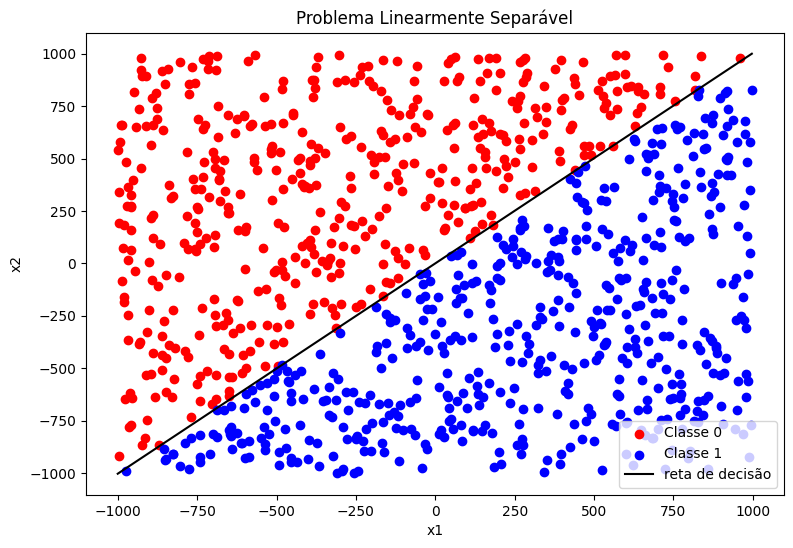

In [6]:
#do treinamento
print(f"total de √©pocas: {n_epocas}")
print(f"total de ajustes: {n_ajustes}")

print() #s√≥ pra criar um espa√ßo entre os dados

#grafico
plt.figure(figsize=(9, 6))

plt.scatter(X[y == 0, 1], X[y == 0, 2], color='red', label='Classe 0')
plt.scatter(X[y == 1, 1], X[y == 1, 2], color='blue', label='Classe 1')

x_val = [min(X[:, 1]), max(X[:, 1])]
y_val = - (w[1] * np.array(x_val) + w[0]) / w[2]
plt.plot(x_val, y_val, label='reta de decis√£o', color='black')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Problema Linearmente Separ√°vel')
plt.legend()
plt.show()

###2.3. Parte III ‚Äì Valida√ß√£o Holdout em Problema N√£o-Linearmente Separ√°vel
Todas as equipes devem considerar o arquivo **dataHoldout.txt** e apresentar um gr√°fico inicial que evidencie que este problema n√£o √© linearmente separ√°vel.
Em seguida, os exemplos devem ser aleatoriamente divididos em duas parti√ß√µes, uma delas contendo 70% dos exemplos (treinamento) e outra contendo 30% (teste). A semente de aleatoriedade deve ser igual ao identificador da equipe. Embora o problema n√£o seja linearmente separ√°vel, vamos utilizar os dados de treinamento para obter uma reta de separa√ß√£o das classes com o neur√¥nio Perceptron (solu√ß√£o poss√≠vel). O neur√¥nio em quest√£o tem fun√ß√£o de ativa√ß√£o degrau com œë = 0, os
valores de Œ∑ e de inicializa√ß√£o de pesos devem seguir as recomenda√ß√µes da literatura e os pesos do neur√¥nio devem ser aleatoriamente escolhidos a partir de U(‚àí0,5, + 0,5). Execute o algoritmo por 100 √©pocas, mas a cada √©poca apresente os exemplos dispon√≠veis com conjunto de treinamento em ordem aleat√≥ria.  
Efetue a previs√£o da sa√≠da deste neur√¥nio para todos os exemplos do conjunto de teste, comparandoa com a sa√≠da desejada e responda ao que se pede:
1. Apresente a matriz de confus√£o das previs√µes efetuadas para o conjunto de testes;
2. Qual a acur√°cia da solu√ß√£o proposta para os dados do conjunto de treinamento inicialmente fornecido?
3. Nos mesmos termos da quest√£o anterior, obtenha os valores de precis√£o, revoca√ß√£o e F-Score. Para estes c√°lculos, est√° liberada a utiliza√ß√£o de sklearn.metrics;
4. A partir destas m√©tricas, discorra acerca da qualidade desta solu√ß√£o perante o conjunto de testes.  

Apresente dois gr√°ficos com a solu√ß√£o obtida pelo neur√¥nio Perceptron, mas um deles contendo os dados de treinamento e o outro contendo os dados de teste. Disponha tais gr√°ficos lado a lado.

**Arrumando o dataset**

In [7]:
dataHoldout = np.fromfile("/content/dataHoldout.txt")
#dataHoldout

n_rows = dataHoldout.size / 3
matriz_dataHoldout = dataHoldout.reshape(int(n_rows), 3)
#matriz_dataHoldout

X = matriz_dataHoldout[:, :-1] #[linha, coluna]
y = matriz_dataHoldout[:, -1]
#X
#y

**Mostrando que n√£o √© linearmente separ√°vel**

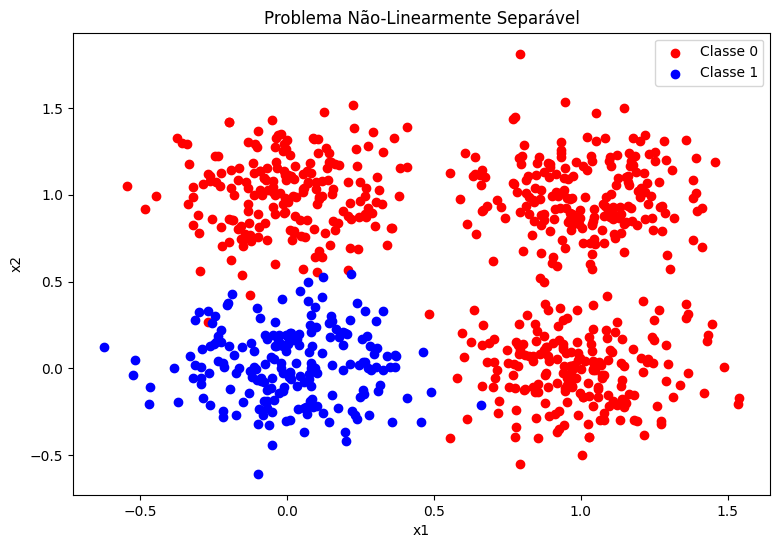

In [8]:
#grafico
plt.figure(figsize=(9, 6))

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Classe 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Classe 1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Problema N√£o-Linearmente Separ√°vel')
plt.legend()
plt.show()

**Valores pr√©-definidos**

In [9]:
#fun√ß√£o de ativa√ß√£o e taxa de aprendizado definidos no exemplo anterior

#pesos
w = np.random.uniform(-0.5, 0.5, 3)  #(x1, x2, bias)
print(f"pesos iniciais: {w}")

pesos iniciais: [-0.40729888  0.13566338  0.23285897]


In [10]:
#SE RODAR ESSA C√âLULA DNV VAI CONCATENAR POR CIMA
#adicionando o bias no input
x0 = np.ones((X.shape[0], 1))
X = np.hstack((x0, X))
#X

**Split dos dados**

In [11]:
#aleatorizando
import random
random.seed(0)

#fazendo o split dos dados
train_size = int(0.7 * len(X))
#print(train_size)

index = [] #aleatorizando os indices pra conseguir parear X e y
for i in range(len(X)):
  index.append(i)
random.shuffle(index)

index_train = index[:train_size] #treino vai do inicio at√© o split
#print(index_train)
#print(len(index_train))
index_test = index[train_size:] #teste vai do slit at√© o final
#print(index_test)
#print(len(index_test))

X_train = X[index_train]
y_train = y[index_train]
#print(y_train)
#valores, contagens = np.unique(y_train, return_counts=True)
#print(valores)
#print(contagens)


X_test = X[index_test]
y_test = y[index_test]
#print(y_test)
#valores, contagens = np.unique(y_test, return_counts=True)
#print(valores)
#print(contagens)

**Treinamento do Perceptron**

üö®‚ö†Ô∏è N√ÉO ENTENDI  
"Execute o algoritmo por
100 √©pocas, mas a cada √©poca apresente os exemplos dispon√≠veis com conjunto de treinamento em
ordem aleat√≥ria."

In [12]:
#trocando a converg√™ncia pelas √©pocas
def train_Perceptron(X, w, y, t_aprend, n_epocas):
  count_epocas = 0

  while True:

    for i in range(X.shape[0]):
      x = np.dot(X[i], w) #aplica os pesos
      pred = f_ativ(x)  #passa pela fun√ß√£o
      erro = y[i] - pred

      if erro != 0:
        w += t_aprend * erro * X[i] #delta

    count_epocas += 1
    if count_epocas >= n_epocas:
      break

  return w

#treianmento
n_epocas = 100
pesos_f = train_Perceptron(X_train, w, y_train, t_aprend, n_epocas)

**Teste do Perceptron**

In [13]:
def test_Perceptron(X, w, y):
  acertos = 0
  predicoes = []

  for i in range(X.shape[0]):
    x = np.dot(X[i], w) #aplica os pesos
    pred = f_ativ(x)  #passa pela fun√ß√£o
    predicoes.append(pred)
    if pred == y[i]:
      acertos += 1

  return acertos, predicoes

n_acertos, predicoes = test_Perceptron(X_test, pesos_f, y_test)
#print(n_acertos)
#print(predicoes)